**IMPORTANDO BIBLIOTECAS**

In [2]:
#Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

#Classes do modelo de aprendizado
from sklearn.neighbors import KNeighborsClassifier

#Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

**ANÁLISE DO CONJUNTO DE DADOS**

In [100]:
#Carregando o dataset
df = pd.read_csv('https://raw.githubusercontent.com/albanoxdz/UFPE_ModPD/main/music_genre.csv')
#dataset = df.query('music_genre == "Hip-Hop" | music_genre == "Classical" | music_genre == "Anime"')
dataset = df.query('music_genre == "Jazz" | music_genre == "Classical" | music_genre == "Rock"')

In [107]:
print("Quantas classes existem nesse dataset?\n%d" %(len(dataset["music_genre"].unique())))
print("\nQuantas instâncias existem no dataset?\n%d" %(len(dataset)))
print("\nQuantas features existem no dataset?\n%d" %(dataset.shape[1]))
print("\nQue features são essas?\n%s" %(str([k for k in dataset.keys()])))
print("\nQual o numero de instâncias por classe?")
print(dataset["music_genre"].value_counts())

Quantas classes existem nesse dataset?
3

Quantas instâncias existem no dataset?
15000

Quantas features existem no dataset?
18

Que features são essas?
['instance_id', 'artist_name', 'track_name', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre']

Qual o numero de instâncias por classe?
0    5000
1    5000
2    5000
Name: music_genre, dtype: int64


In [68]:
dataset

instance_id        artist_name                track_name  popularity  \
5000       36281.0  Capcom Sound Team              終幕組曲【冒險の終わり】        11.0   
5001       78964.0              ayaka                そこまで歩いていくよ        26.0   
5002       31517.0         Hachioji P   KiLLER LADY - Eight Mix        29.0   
5003       29349.0               LiSA            Bad Sweet Trap        18.0   
5004       84837.0    Hiroyuki Sawano            Call Your Name        50.0   
...            ...                ...                       ...         ...   
50000      58878.0              BEXEY                  GO GETTA        59.0   
50001      43557.0          Roy Woods       Drama (feat. Drake)        72.0   
50002      39767.0             Berner  Lovin' Me (feat. Smiggz)        51.0   
50003      57944.0          The-Dream         Shawty Is Da Shit        65.0   
50004      63470.0  Naughty By Nature            Hip Hop Hooray        67.0   

       acousticness  danceability  duration_ms  energy  instrumentalness key  \
5000        0.01540         0.362     429560.0   0.456          0.024100   D   
5001        0.82000         0.627         -1.0   0.350          0.000000   G   
5002        0.00857         0.643     234874.0   0.966          0.003310  A#   
5003        0.00711         0.585     229147.0   0.991          0.000002   F   
5004        0.01450         0.567     268333.0   0.300          0.000000   B   
...             ...           ...          ...     ...               ...  ..   
50000       0.03340         0.913         -1.0   0.574          0.000000  C#   
50001       0.15700         0.709     251860.0   0.362          0.000000   B   
50002       0.00597         0.693     189483.0   0.763          0.000000   D   
50003       0.08310         0.782     262773.0   0.472          0.000000   G   
50004       0.10200         0.862     267267.0   0.642          0.000000  F#   

       liveness  loudness   mode  speechiness               tempo  \
5000     0.2580   -11.355  Minor       0.0376             117.634   
5001     0.1250    -7.951  Major       0.0291             135.937   
5002     0.2550    -3.902  Minor       0.0442             131.982   
5003     0.1100    -2.817  Minor       0.1170                   ?   
5004     0.0687    -8.421  Minor       0.0291             141.819   
...         ...       ...    ...          ...                 ...   
50000    0.1190    -7.022  Major       0.2980   98.02799999999999   
50001    0.1090    -9.814  Major       0.0550  122.04299999999999   
50002    0.1430    -5.443  Major       0.1460             131.079   
50003    0.1060    -5.016  Minor       0.0441   75.88600000000001   
50004    0.2720   -13.652  Minor       0.1010   99.20100000000001   

      obtained_date  valence music_genre  
5000          4-Apr    0.332       Anime  
5001          4-Apr    0.173       Anime  
5002          4-Apr    0.912       Anime  
5003          4-Apr    0.580       Anime  
5004          4-Apr    0.196       Anime  
...             ...      ...         ...  
50000         4-Apr    0.330     Hip-Hop  
50001         4-Apr    0.113     Hip-Hop  
50002         4-Apr    0.395     Hip-Hop  
50003         4-Apr    0.354     Hip-Hop  
50004         4-Apr    0.765     Hip-Hop  

[15000 rows x 18 columns]

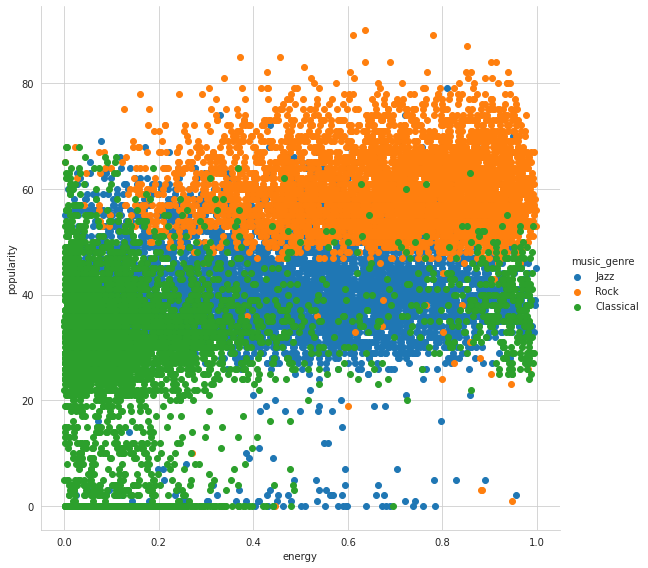

In [102]:
# Distribuição das classes pelas features SepalLengthCm e SepalWidthCm
sns.set_style("whitegrid")
sns.FacetGrid(dataset, hue ="music_genre",
              height = 8).map(plt.scatter,
                              'energy',
                              'popularity').add_legend()

In [103]:
# Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
dataset['music_genre'] = pd.factorize(dataset['music_genre'])[0]
dataset

# Setosa - 0
# Versicolor - 1
# Virginica - 2

instance_id              artist_name  \
10005      77089.0                Blockhead   
10006      53044.0                  FloFilz   
10007      84784.0                   Bonobo   
10008      29200.0            Nils Landgren   
10009      38711.0       Masayoshi Takanaka   
...            ...                      ...   
45000      72178.0  Wolfgang Amadeus Mozart   
45001      32444.0    New York Philharmonic   
45002      91128.0            Georges Bizet   
45003      27453.0             Edvard Grieg   
45004      44438.0    Johann Sebastian Bach   

                                              track_name  popularity  \
10005                      Cheer up, You're Not Dead Yet        44.0   
10006                                            Corners        34.0   
10007                                   We Could Forever        51.0   
10008                                    A Child Is Born        39.0   
10009                                         Samba Pati        36.0   
...                                                  ...         ...   
45000  Die Zauberflöte, K. 620: Wie stark ist nicht d...        22.0   
45001  Symphony No. 2 in D Major, Op. 73: II. Adagio ...        26.0   
45002  Bizet: Carmen, WD 31, Act 1 Scene 4: No. 5, Ha...        54.0   
45003          Peer Gynt-Suite Nr. 1, Op. 46: I. Morning        42.0   
45004       Suite No. 2 in B Minor, BWV 1067: VI. Menuet        36.0   

       acousticness  danceability  duration_ms  energy  instrumentalness key  \
10005       0.00621         0.711     285987.0  0.6210          0.029700   G   
10006       0.34700         0.729     103703.0  0.5150          0.006920   C   
10007       0.01810         0.669         -1.0  0.8850          0.880000   G   
10008       0.91800         0.484     228733.0  0.0693          0.000069   F   
10009       0.03450         0.473     342867.0  0.8230          0.446000   G   
...             ...           ...          ...     ...               ...  ..   
45000       0.91100         0.326     368640.0  0.1330          0.000000   G   
45001       0.96500         0.126     514213.0  0.2040          0.869000   B   
45002       0.97600         0.363     262147.0  0.1150          0.000000   D   
45003       0.98500         0.123     259573.0  0.0174          0.906000   E   
45004       0.77200         0.486      74600.0  0.1570          0.906000  G#   

       liveness  loudness   mode  speechiness               tempo  \
10005    0.1590    -7.429  Major       0.0382             142.065   
10006    0.1270   -10.147  Major       0.1840              79.969   
10007    0.2650    -7.080  Minor       0.0378                   ?   
10008    0.1390   -15.542  Major       0.0346   82.70700000000001   
10009    0.3060    -6.625  Major       0.0630             104.694   
...         ...       ...    ...          ...                 ...   
45000    0.1300   -20.493  Major       0.0557               92.09   
45001    0.1060   -16.474  Major       0.0395   82.43700000000001   
45002    0.0992   -17.325  Major       0.0689                   ?   
45003    0.1250   -23.671  Major       0.0408              71.705   
45004    0.1470   -19.078  Minor       0.0375  124.73700000000001   

      obtained_date  valence  music_genre  
10005         4-Apr   0.6070            0  
10006         1-Apr   0.2870            0  
10007         4-Apr   0.6360            0  
10008         3-Apr   0.2060            0  
10009         4-Apr   0.3830            0  
...             ...      ...          ...  
45000         4-Apr   0.2060            2  
45001         3-Apr   0.0387            2  
45002         4-Apr   0.2310            2  
45003         3-Apr   0.0352            2  
45004         3-Apr   0.6190            2  

[15000 rows x 18 columns]

**SEPARANDO O CONJUNTO DE DADOS**

In [116]:
#Vamos usar somente duas features SepalLengthCm e SepalWidthCm
X = dataset.iloc[:,[3,7]]
y = dataset.iloc[:,[17]]

print(X.values)

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

[[4.40e+01 6.21e-01]
 [3.40e+01 5.15e-01]
 [5.10e+01 8.85e-01]
 ...
 [5.40e+01 1.15e-01]
 [4.20e+01 1.74e-02]
 [3.60e+01 1.57e-01]]


**TREINAMENTO DO MODELO**

In [117]:
# apply the dtype attribute
result = dataset.dtypes

print("Output:")
print(result)

check_for_nan = dataset['danceability'].isnull().values.any()
num_nan = dataset['danceability'].isnull().sum()
#dataset[dataset['danceability'].isnull()].index.tolist()

#dataset = dataset.dropna(how='any',axis=0)
#dataset[dataset['danceability'].isnull()].index.tolist()
print(check_for_nan)
print(num_nan)

Output:
instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre           int64
dtype: object
False
0


In [118]:
model = KNeighborsClassifier()
#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)


#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1254
           1       0.87      0.92      0.89      1209
           2       0.84      0.81      0.82      1287

    accuracy                           0.82      3750
   macro avg       0.82      0.82      0.82      3750
weighted avg       0.82      0.82      0.82      3750



**Métricas**

*   **Precision** - $\frac{tp}{(tp + fp)}$
*   **Recall** - $\frac{tp}{(tp + fn)}$ 
*   **F1-score** - $2 * \frac{(precision * recall)}{(precision + recall)}$
*   **Accuracy** - $\frac{C}{T}$
*   **Macro avg** - Calcule as métricas para cada rótulo e encontre sua média não ponderada.
*   **Weighted avg** - Calcule as métricas para cada rótulo e encontre sua média ponderada pelo suporte (o número de instâncias verdadeiras para cada rótulo).

**tp** - verdadeiros positivos

**fp** - falsos positivos

**fn** - falsos negativos

**C** - Número de predições corretas

**T** - Número total de predições

**REGIÃO DE DECISÃO**

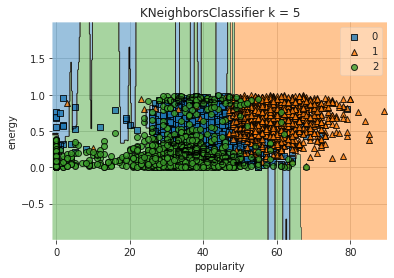

In [119]:
plot_decision_regions(np.array([X_test["popularity"].values, X_test["energy"].values]).T, y_test.values.reshape(-1,1).T[0], model)
plt.xlabel("popularity")
plt.ylabel("energy")

plt.title(model.__class__.__name__ + " k = " + str(model.n_neighbors))
plt.show()

**VARIANDO O TAMANHO DA VIZINHANÇA**

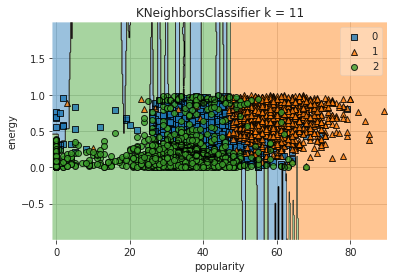

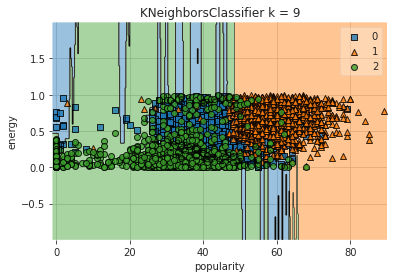

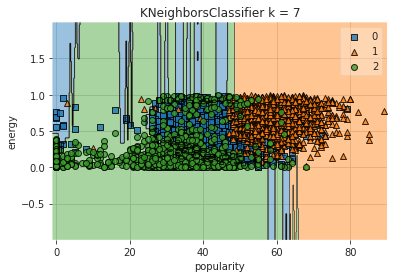

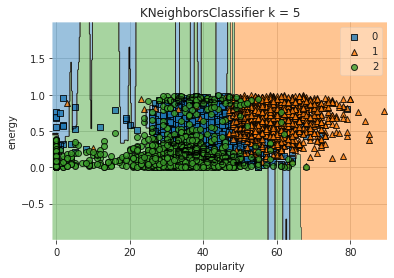

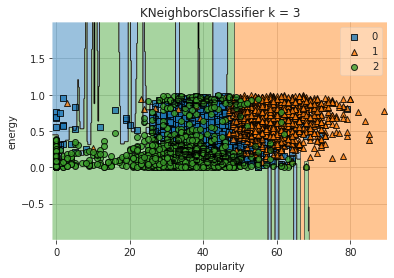

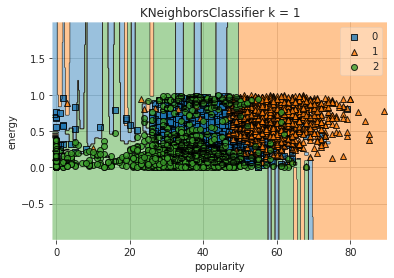

In [121]:
for k in [11, 9, 7, 5, 3, 1]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    plot_decision_regions(np.array([X_test["popularity"].values, X_test["energy"].values]).T, y_test.values.reshape(-1,1).T[0], model)
    plt.xlabel("popularity")
    plt.ylabel("energy")

    plt.title(model.__class__.__name__ + " k = " + str(model.n_neighbors))
    plt.show()

**MEDIDA DE DISTÂNCIA**

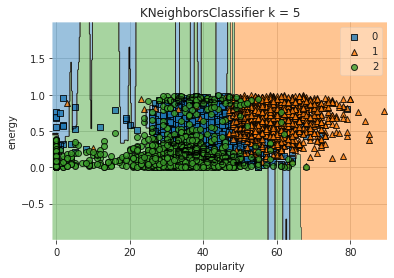

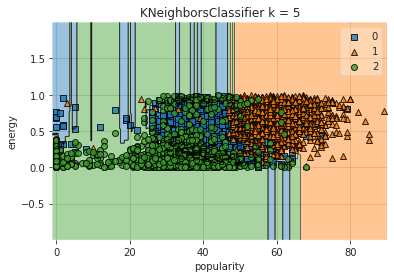

In [122]:
for m in ["euclidean", "manhattan"]:
    model = KNeighborsClassifier(metric=m)
    model.fit(X_train, y_train)

    plot_decision_regions(np.array([X_test["popularity"].values, X_test["energy"].values]).T, y_test.values.reshape(-1,1).T[0], model)
    plt.xlabel("popularity")
    plt.ylabel("energy")

    plt.title(model.__class__.__name__ + " k = " + str(model.n_neighbors))
    plt.show()